In [1275]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import functools

In [1276]:
csvs = ["threads","fastflow","fastflow_blocking","fastflow_blocking_no_map","threads_pinned","omp"]
#df = pd.concat([pd.read_csv(f"../data/{csv}A.csv") for csv in csvs]).reset_index()

df = pd.concat([
        pd.read_csv("../data/threads4.csv"),
        pd.read_csv("../data/fastflow2.csv"),
        pd.read_csv("../data/fastflow_blockingA.csv"),
        pd.read_csv("../data/fastflow_blocking_no_map2.csv"),
        pd.read_csv("../data/threads_pinnedA.csv"),
        pd.read_csv("../data/ompA.csv")
        ]).reset_index()
sequentials = pd.read_csv("../data/sequentialA.csv").reset_index()

In [1277]:
df = df[df['nworkers'] >= 2]
df['nworkers'] -= 1

programs = df['name'].unique()
all_n_workers = df['nworkers'].unique()
filenames = df['filename'].unique()

def crop_slash(e): return e.split('/')[1].split('.')[0]

programs = [('threads',                  'd', '-'),
            ('threads_pinned',           's', '-'),
            ('fastflow',                 '^', '-'),
            ('fastflow_blocking',        'v', '-'),
            ('fastflow_blocking_no_map', 'P', '-'),
            ('omp',                      '*', '-')]

In [1278]:
sequentials['read_time'] = [6770,2636,1104]
sequentials['init_time'] = [173849,62852,35543]
sequentials['total_time'] = [66790000,9810000,2080000]
sequentials['processing_time'] = [72292,25126,9525]
sequentials['frames'] = [816,431,227]

# Speedup

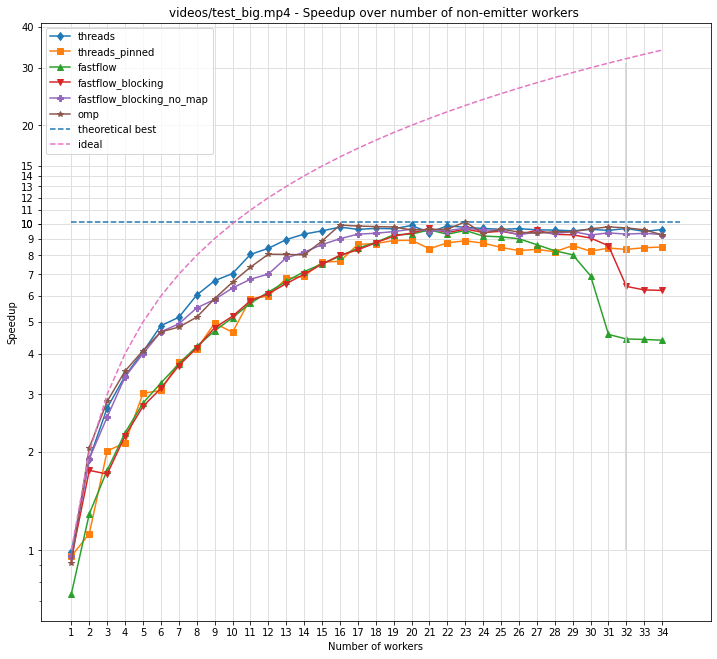

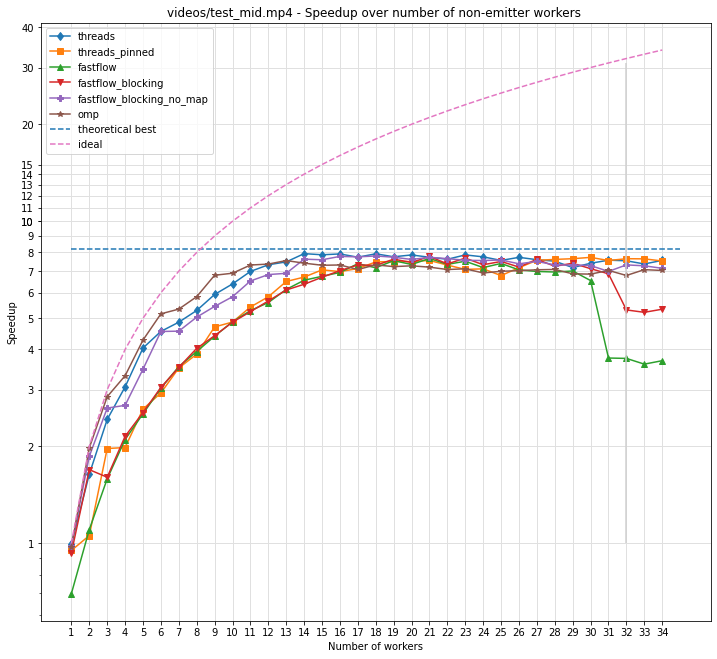

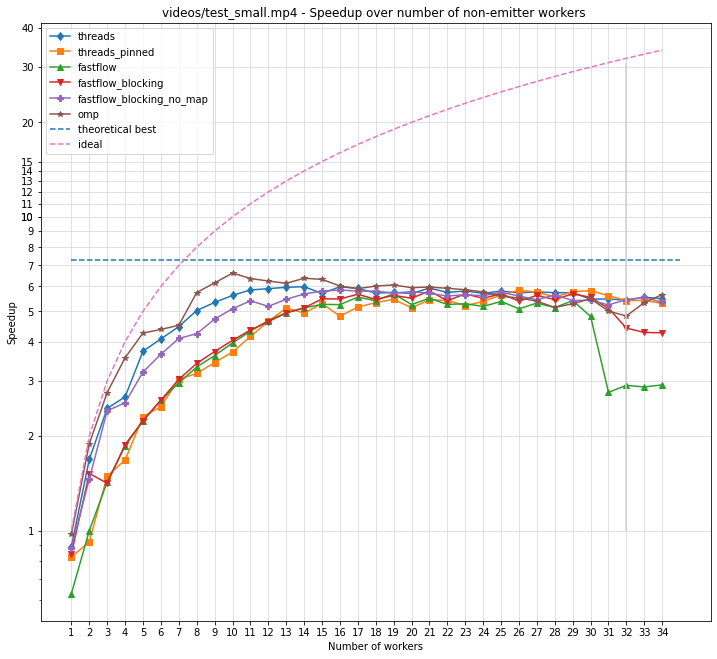

In [1279]:
for f in filenames:
    plt.gcf().set_size_inches(12, 11) 
    def seq(n): return sequentials[sequentials['filename'] == f][n].values[0]

    serial_time = seq('init_time') + seq('read_time') * seq('frames')
    serial_fraction = serial_time / seq('total_time')
    max_speedup = 1 / serial_fraction

    for p, m, d in programs:
        y = seq('total_time')/df[(df['name'] == 'bin/'+p) & (df['filename'] == f)]['avg']
        plt.plot(all_n_workers, y, d, label=p, marker=m)
    plt.grid(color='#e0e0e0', linestyle='-', linewidth=1)
    plt.yscale('log') 
    plt.yticks(list(range(0,16,1)) + list(range(10,100,10)))
    plt.gca().get_yaxis().set_major_formatter(mplt.ticker.ScalarFormatter())
    plt.gca().get_yaxis().get_major_formatter().labelOnlyBase = False
    plt.vlines(32, ymin=1, ymax=31, color='#d0d0d0', linestyle='-')
    plt.hlines(max_speedup, xmin=1, xmax=35, linestyle='--',label='theoretical best')
    #plt.hlines(seq('processing_time')/(seq('read_time')), xmin=1, xmax=35, linestyle='-',label='theoretical best')

    plt.plot(all_n_workers, all_n_workers, '--', label='ideal')
    plt.xticks(all_n_workers)

    plt.legend()
    plt.ylabel("Speedup")
    plt.xlabel("Number of workers")
    plt.title(f"{f} - Speedup over number of non-emitter workers ")
    plt.savefig(f'speedup_{crop_slash(f)}.svg')  
    plt.show()

# Completion time

threads: lowest completion time 6768320, nw: 19, Ts: 8081, computed proc: 73732, computed read: 9345, proc: 72292, read: 7905
threads_pinned: lowest completion time 7512678, nw: 19, Ts: 8993, computed proc: 73732, computed read: 9345, proc: 72292, read: 7905
fastflow: lowest completion time 6980393, nw: 20, Ts: 8341, computed proc: 73732, computed read: 9345, proc: 72292, read: 7905
fastflow_blocking: lowest completion time 6908630, nw: 20, Ts: 8253, computed proc: 73732, computed read: 9345, proc: 72292, read: 7905
fastflow_blocking_no_map: lowest completion time 6896481, nw: 22, Ts: 8238, computed proc: 73732, computed read: 9345, proc: 72292, read: 7905
omp: lowest completion time 6598047, nw: 22, Ts: 7872, computed proc: 73732, computed read: 9345, proc: 72292, read: 7905


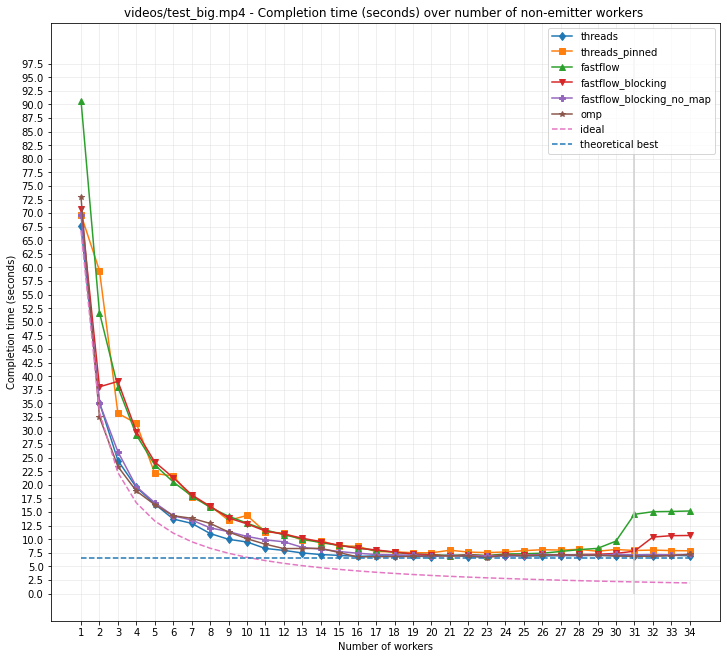

threads: lowest completion time 1236564, nw: 13, Ts: 2723, computed proc: 19979, computed read: -2510, proc: 25126, read: 2636
threads_pinned: lowest completion time 1270058, nw: 29, Ts: 2800, computed proc: 19979, computed read: -2510, proc: 25126, read: 2636
fastflow: lowest completion time 1279597, nw: 20, Ts: 2823, computed proc: 19979, computed read: -2510, proc: 25126, read: 2636
fastflow_blocking: lowest completion time 1261135, nw: 20, Ts: 2780, computed proc: 19979, computed read: -2510, proc: 25126, read: 2636
fastflow_blocking_no_map: lowest completion time 1257315, nw: 17, Ts: 2771, computed proc: 19979, computed read: -2510, proc: 25126, read: 2636
omp: lowest completion time 1299462, nw: 12, Ts: 2869, computed proc: 19979, computed read: -2510, proc: 25126, read: 2636


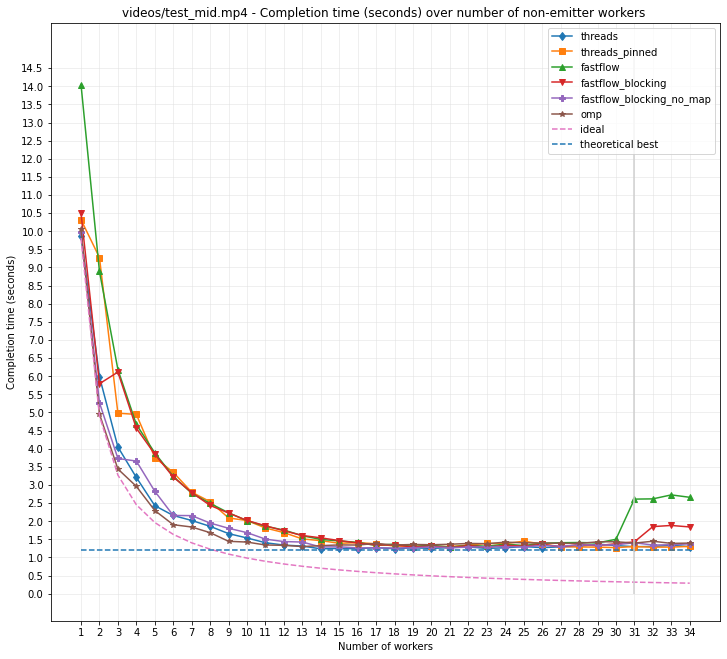

threads: lowest completion time 347443, nw: 13, Ts: 1374, computed proc: 7902, computed read: -518, proc: 9525, read: 1104
threads_pinned: lowest completion time 356556, nw: 25, Ts: 1414, computed proc: 7902, computed read: -518, proc: 9525, read: 1104
fastflow: lowest completion time 365763, nw: 18, Ts: 1454, computed proc: 7902, computed read: -518, proc: 9525, read: 1104
fastflow_blocking: lowest completion time 358378, nw: 20, Ts: 1422, computed proc: 7902, computed read: -518, proc: 9525, read: 1104
fastflow_blocking_no_map: lowest completion time 356004, nw: 15, Ts: 1411, computed proc: 7902, computed read: -518, proc: 9525, read: 1104
omp: lowest completion time 314376, nw: 9, Ts: 1228, computed proc: 7902, computed read: -518, proc: 9525, read: 1104


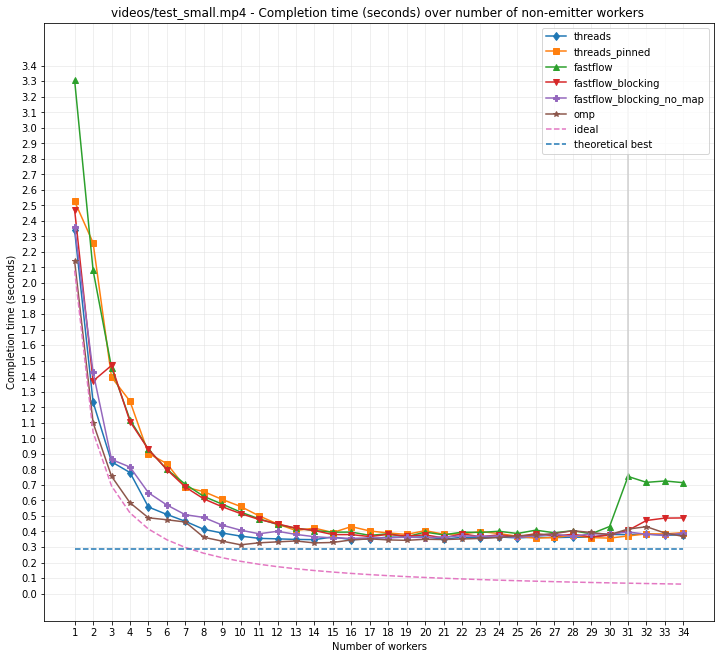

In [1280]:
for f in filenames:
    plt.gcf().set_size_inches(12, 11) 
    def seq(n): return sequentials[sequentials['filename'] == f][n].values[0]

    for p, m, d in programs:
        data = df[(df['name'] == 'bin/'+p) & (df['filename'] == f)]
        avg_service_time = int( (data['avg'].min() - seq('init_time')) / seq('frames'))
        comp_read        = int( (seq('total_time') - seq('init_time')) / seq('frames') - seq('processing_time'))
        comp_seq         = int( (seq('total_time') - seq('init_time')) / seq('frames') - seq('read_time'))
        
        print(f"{p}: lowest completion time {data['avg'].min()}, nw: {data['avg'].argmin()}, Ts: {avg_service_time}, computed proc: {comp_seq}, computed read: {comp_read}, proc: {seq('processing_time')}, read: {seq('read_time')}")
        y = data['avg']
        #e = df[(df['name'] == p) & (df['filename'] == f)]['std']
        plt.plot(all_n_workers, y/1e6, d, label=p, marker=m)
    plt.grid(color='#e0e0e0', linestyle='-', linewidth=0.5)
    plt.plot(all_n_workers, seq('total_time')/1e6/all_n_workers, '--', label='ideal')
    plt.xticks(all_n_workers)
    
    plt.hlines((seq('init_time') + seq('read_time')*seq('frames'))/1e6, xmin=1, xmax=34, linestyle='--',label='theoretical best')
    
    if f == 'videos/test_big.mp4':
        plt.yticks([x*2.5 for x in range(0,40,1)])
        plt.vlines(31, ymin=0, ymax=40*2.5, color='#d0d0d0', linestyle='-')
    if f == 'videos/test_mid.mp4':
        plt.yticks([x*0.5 for x in range(0,30,1)])
        plt.vlines(31, ymin=0, ymax=30*0.5, color='#d0d0d0', linestyle='-')
    if f == 'videos/test_small.mp4':
        plt.yticks([x*0.1 for x in range(0,35,1)])
        plt.vlines(31, ymin=0, ymax=35*0.1, color='#d0d0d0', linestyle='-')

    plt.legend()
    plt.ylabel("Completion time (seconds)")
    plt.xlabel("Number of workers")
    plt.title(f"{f} - Completion time (seconds) over number of non-emitter workers ")
    plt.savefig(f'completion_time_{crop_slash(f)}.svg')  
    plt.show()

# Efficiency

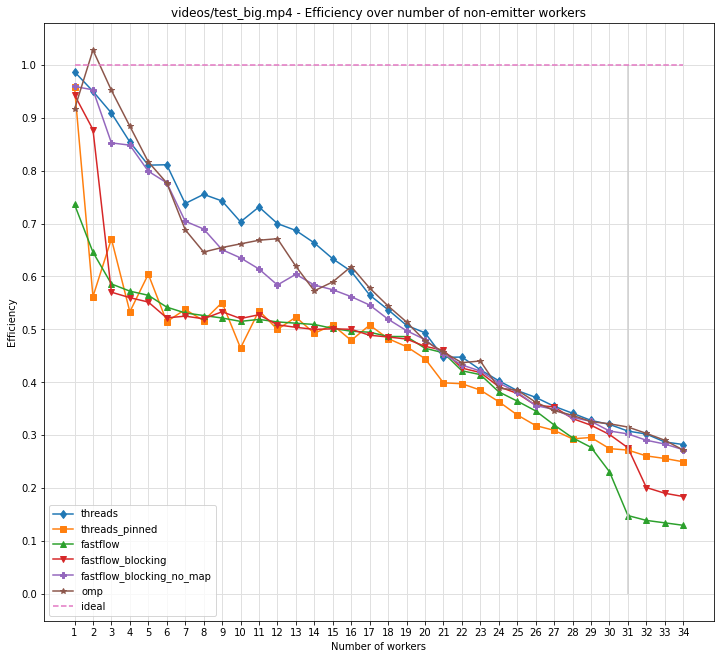

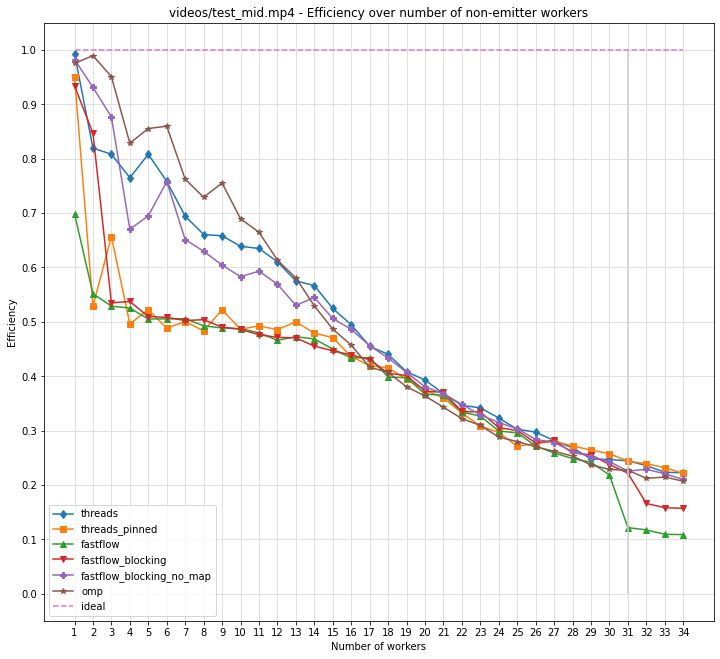

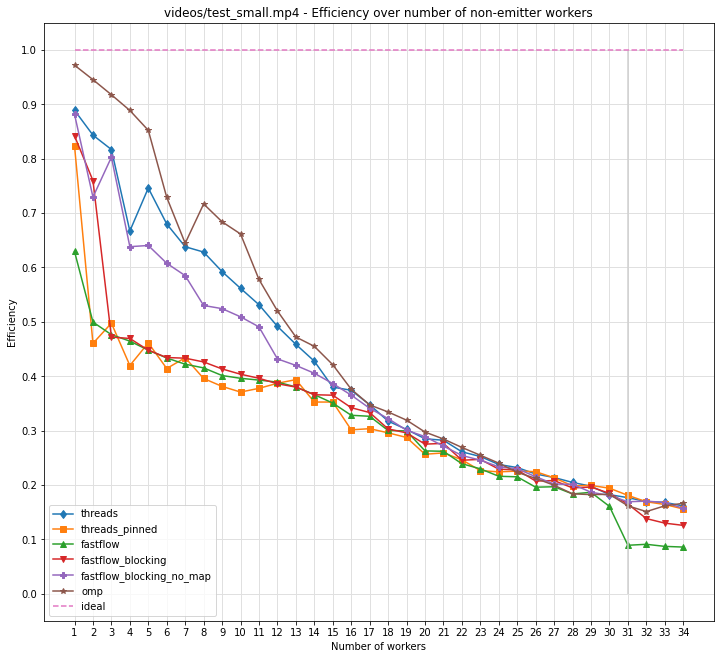

In [1281]:
for f in filenames:
    plt.gcf().set_size_inches(12, 11) 
    def seq(n): return sequentials[sequentials['filename'] == f][n].values[0]
    for p, m, d in programs:
        y = (seq('total_time') / all_n_workers) / df[(df['name'] == 'bin/'+p) & (df['filename'] == f)]['avg']
        plt.plot(all_n_workers, y, d, label=p, marker=m)
    plt.grid(color='#e0e0e0', linestyle='-', linewidth=1)
    plt.yticks([x*0.1 for x in range(0,11,1)])
    plt.gca().get_yaxis().set_major_formatter(mplt.ticker.ScalarFormatter())
    plt.gca().get_yaxis().get_major_formatter().labelOnlyBase = False
    plt.vlines(31, ymin=0, ymax=1, color='#d0d0d0', linestyle='-')

    plt.plot(all_n_workers, all_n_workers * 0 + 1, '--', label='ideal')
    plt.xticks(all_n_workers)

    plt.legend()
    plt.ylabel("Efficiency")
    plt.xlabel("Number of workers")
    plt.title(f"{f} - Efficiency over number of non-emitter workers")
    plt.savefig(f'efficiency_{crop_slash(f)}.svg')  
    plt.show()